# Modeling Time Series using ML Methods

## Support Vector Regressor (SVR)

### Machine Learning Methods

Models with a Machine Learning or Artificial Intelligence foundation Standard algorithms are applied onto the time series data once transformed into features. 

### Process with sklearn:

- prepare data into 2 numpy arrays x and y. 
- compute training and test data
- construct model (SVR)
- fit model with m.fit(x_train, y_train)
- predict on test data with m.predict(x_test)
- evaluate error with one of the metrics in sklearn.metrics

### Pros

1. Do not require underlying assumptions to be made about the data, such as seasonality
2. Robust
3. Adaptable

### Cons

1. Interpretability is often lost
2. Necessary to run extensive tests to ensure robustness

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit

# data visualization 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from acquire import get_store_data
from prepare import prep_store_data

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = prep_store_data(get_store_data())

In [3]:
df.head()

,sale_id,store_id,item_id,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,295813,3,17,26,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,125995,10,7,32,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,314073,3,18,45,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,332333,3,19,34,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,San Antonio,TX


### Aggregate to preferred period

In [4]:
aggregation = 'mean' # we might switch this for sum
daily_df = df.sale_amount.resample('D').agg(aggregation)

### Split into test/train & convert dataframe to array

In [5]:
train = np.array(daily_df[:'2016'])
test = np.array(daily_df['2017':])

### Create x and y variables with y being the values after n steps

In [6]:
def embed_data(x, steps):
    n = len(x)
    xout = np.zeros((n-steps, steps))
    yout = x[steps:]
    for i in np.arange(steps, n):
        xout[i-steps] = x[i-steps:i]
    return xout, yout

In [7]:
xtrain,ytrain = embed_data(train, 3)
xtest,ytest = embed_data(test, 3)

In [8]:
print(xtrain[0:5])
print(ytrain[0:5])

[[27.392 27.356 28.976]
 [27.356 28.976 31.354]
 [28.976 31.354 32.474]
 [31.354 32.474 34.582]
 [32.474 34.582 23.538]]
[31.354 32.474 34.582 23.538 27.12 ]


### Create the Support Vector Regressor Object

In [9]:
m = svm.SVR(kernel='rbf', C=1, gamma=0.1)
# C is our regularization constant
m_fit = m.fit(xtrain, ytrain)

### Predict in-sample/training dataset

In [10]:
y_pred = m_fit.predict(xtrain)

### Evaluate

In [11]:
# mean squared error
mse = metrics.mean_squared_error(y_pred, ytrain)
print(mse)

75.20112245606627


In [12]:
# root mean squared error
import math
rmse = math.sqrt(mse)
print(rmse)

8.671858074026943


### Plot the predicted data 

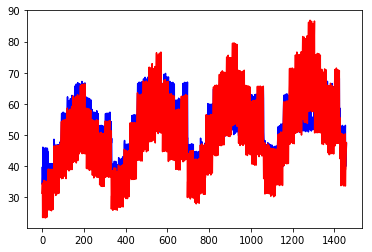

In [13]:
plt.plot(y_pred, 'b-', ytrain, 'r-')

### Plot the predicted values with the actual values

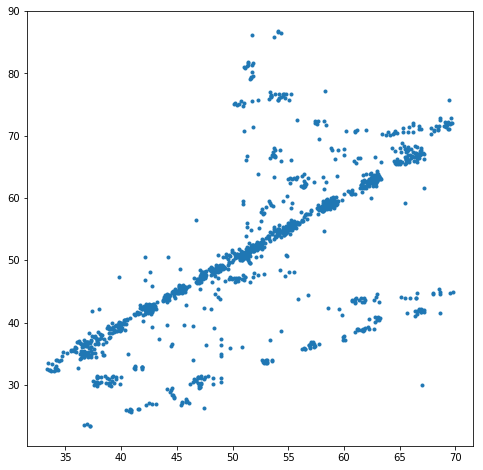

In [14]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1)
ax.plot(y_pred, ytrain, '.')
plt.show()

### Predict on out-of-sample/test dataset

In [15]:
y_pred = m_fit.predict(xtest)

### Evaluate

In [16]:
# mean squared error
mse = metrics.mean_squared_error(y_pred, ytest)
print(mse)

172.36502608513274


In [17]:
# root mean squared error
import math
rmse = math.sqrt(mse)
print(rmse)

13.12878616190898


### Plot Predictions

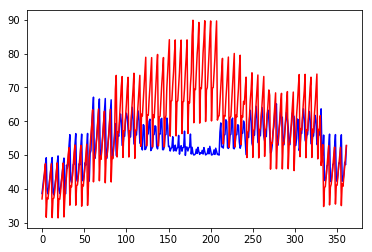

In [18]:
plt.plot(y_pred, 'b-', ytest, 'r-')